In [74]:
import pandas as pd
import numpy as np

In [75]:
# Import the clean dataset after preprocessing
df = pd.read_csv("clean_df.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(2)

,Unnamed: 0,fSize,fAsym,fM3Long,fAlpha,fMagnitude,class
0,5278,3.2024,-53.8742,51.5739,8.4866,81.5888,0
1,3137,2.4541,48.3458,33.6616,18.8968,59.1717,0


In [50]:
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)

In [51]:
# Normalizing all the data (mean approx 0, std approx 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
print(X_train[:1])
print("Shape = ",X_train.shape)
print("Mean = ",X_train.mean().round(2))
print("STD = ",X_train.std())

[[-0.74417585  0.48389402  0.347507    1.08354189 -0.61634277]]
Shape =  (9202, 5)
Mean =  0.0
STD =  1.0


In [53]:
# Train Logistic Regression model
# Default C = 1
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred = lr_model.predict(X_test)

In [55]:
# Visuialize output
# True vs Predicted values
pred = y_pred.reshape(-1,1)
test = y_test.to_numpy().reshape(-1,1)
concat = np.concatenate((test, pred), axis=1)
print(concat)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [56]:
# Accuracy metrics function
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,mean_squared_error,accuracy_score,confusion_matrix
def metrics(y_test , y_pred):
    acc = accuracy_score(y_pred,y_test) * 100
    mse = mean_squared_error(y_pred , y_test)
    report=classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Mean squared error = ", mse)
    print(f"Accuracy = {acc:.2f}%")
    print("Classification Report: \n",report)
    print("Confusion Matrix: \n",cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


Mean squared error =  0.22616632860040567
Accuracy = 77.38%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      2197
           1       0.71      0.83      0.76      1747

    accuracy                           0.77      3944
   macro avg       0.78      0.78      0.77      3944
weighted avg       0.78      0.77      0.77      3944

Confusion Matrix: 
 [[1602  595]
 [ 297 1450]]


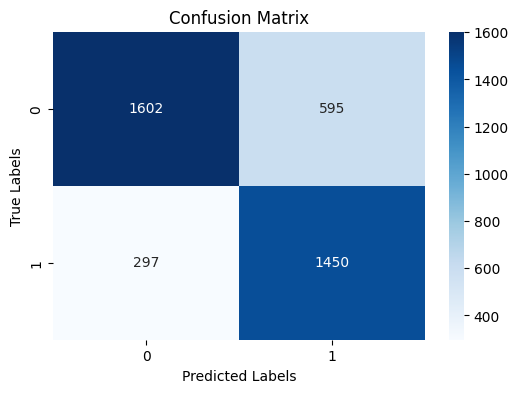

In [57]:
metrics(y_pred,y_test)

In [58]:
# Tuning parameters
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=1000)
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100,200,300,400]
}
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(model,param_grid=parameters,cv=10,return_train_score=True,scoring=scorer)

In [59]:
grid_search.fit(X_train,y_train)

/home/hassan/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hassan/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hassan/.local/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/hassan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, sel

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100, 200, 300, 400],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring=make_scorer(accuracy_score))

In [60]:
print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [61]:
# Visualize Results
results = pd.DataFrame(grid_search.cv_results_)
results = results.dropna()
needed_results=results[['params','param_penalty','param_C','mean_train_score','mean_test_score']]
needed_results

,params,param_penalty,param_C,mean_train_score,mean_test_score
1,"{'C': 0.1, 'penalty': 'l2'}",l2,0.1,0.770352,0.770156
3,"{'C': 1, 'penalty': 'l2'}",l2,1,0.770074,0.770048
5,"{'C': 10, 'penalty': 'l2'}",l2,10,0.770014,0.770048
7,"{'C': 100, 'penalty': 'l2'}",l2,100,0.770038,0.770048
9,"{'C': 200, 'penalty': 'l2'}",l2,200,0.770038,0.770048
11,"{'C': 300, 'penalty': 'l2'}",l2,300,0.770038,0.770048
13,"{'C': 400, 'penalty': 'l2'}",l2,400,0.770038,0.770048


In [62]:
y_pred = grid_search.best_estimator_.predict(X_test)

Mean squared error =  0.22692697768762676
Accuracy = 77.31%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      2202
           1       0.71      0.83      0.76      1742

    accuracy                           0.77      3944
   macro avg       0.78      0.78      0.77      3944
weighted avg       0.78      0.77      0.77      3944

Confusion Matrix: 
 [[1603  599]
 [ 296 1446]]


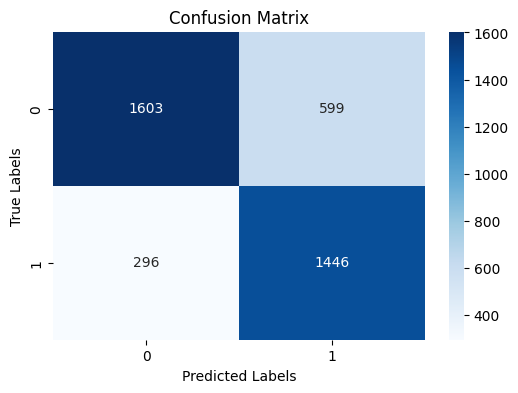

In [63]:
metrics(y_pred,y_test)

In [64]:
# KNN using deafult parameters
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred= knn_model.predict(X_test)

Mean squared error =  0.21120689655172414
Accuracy = 78.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      2114
           1       0.74      0.83      0.79      1830

    accuracy                           0.79      3944
   macro avg       0.79      0.79      0.79      3944
weighted avg       0.79      0.79      0.79      3944

Confusion Matrix: 
 [[1590  524]
 [ 309 1521]]


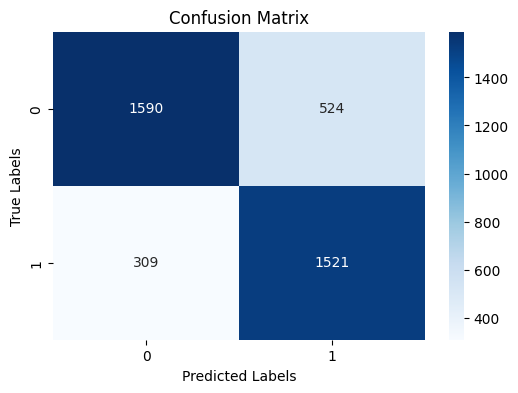

In [66]:
metrics(y_pred,y_test)

In [67]:
# Tuning K
model = KNeighborsClassifier()
parameters = {"n_neighbors":list(range(2,25))}
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(model,param_grid=parameters,cv=10,return_train_score=True,scoring=scorer)


In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24]},
             return_train_score=True, scoring=make_scorer(accuracy_score))

In [69]:
print(grid_search.best_params_)

{'n_neighbors': 19}


In [70]:
results = pd.DataFrame(grid_search.cv_results_)

In [71]:
needed_results=results[['param_n_neighbors','mean_train_score','mean_test_score']]
needed_results

,param_n_neighbors,mean_train_score,mean_test_score
0,2,0.861660,0.750270
1,3,0.874013,0.774722
2,4,0.839504,0.771245
3,5,0.847461,0.782764
4,6,0.830049,0.781895
5,7,0.833611,0.790370
6,8,0.823215,0.788414
7,9,0.829228,0.793847
8,10,0.820619,0.791347
9,11,0.824096,0.795368


In [72]:
y_pred = grid_search.best_estimator_.predict(X_test)

Mean squared error =  0.19421906693711968
Accuracy = 80.58%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      2191
           1       0.74      0.86      0.80      1753

    accuracy                           0.81      3944
   macro avg       0.81      0.81      0.81      3944
weighted avg       0.82      0.81      0.81      3944

Confusion Matrix: 
 [[1662  529]
 [ 237 1516]]


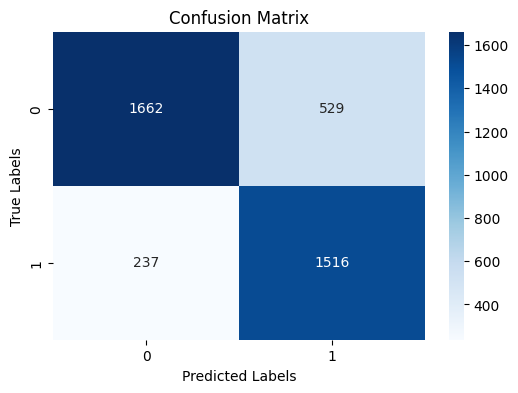

In [73]:
metrics(y_pred,y_test)